## **Librerías**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from matplotlib.patches import Patch

In [ ]:
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

In [4]:
import lightgbm as lgbm

In [5]:
from sklearn.model_selection import (
    train_test_split, 
    TimeSeriesSplit, 
    KFold, 
    StratifiedKFold, 
    GroupKFold, 
    StratifiedGroupKFold
) 

from sklearn.metrics import (
    accuracy_score, 
    roc_auc_score, 
    classification_report,
    confusion_matrix
)


In [6]:
import utils.functions as utils

## **Datos**

In [7]:
df = pd.read_csv('./Datos/healthcare-dataset-stroke-data.csv')

In [8]:
df.sample()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3331,10511,Male,5.0,0,0,No,children,Urban,101.61,33.1,Unknown,0


### **Limpieza de datos**

In [9]:
# Volvemos booleana la variable ever_married
df['ever_married'].replace({
    'Yes': True,
    'No': False
    }, inplace=True) 

In [10]:
# Ajustamos el formato de nuestras variables categoricas
df['gender'] = df['gender'].astype('category')
df['smoking_status'] = df['smoking_status'].astype('category')
df['Residence_type'] = df['Residence_type'].astype('category')
df['work_type'] = df['work_type'].astype('category')

In [11]:
# Creamos una variable aleatoria doctor
df['doctor'] = np.random.randint(0, 8, size=len(df))

In [12]:
# Escogemos aleatoriamente 500 ids que quedaran fuera de nuestro dataset de entrenamiento
holdout_ids = df.sample(n=500, random_state=529).index

In [13]:
# Preparamos nuestra dataset de entrenamiento
df_train = df.loc[
        ~df.index.isin(holdout_ids)
    ].sample(
        frac=1, 
        random_state=529
        ).sort_values(
            'doctor'
            ).reset_index(
                drop=True
                )

In [14]:
# Preparamos nuestro dataset de validación
df_holdout = df.loc[
        df.index.isin(holdout_ids)
    ].sample(
        frac=1, 
        random_state=529
        ).sort_values(
            'doctor'
            ).reset_index(
                drop=True
                )

### **Datos para el modelo**

In [15]:
features = [
    'gender',
    'age',
    'hypertension', 
    'heart_disease', 
    'ever_married',
    'work_type', 
    'Residence_type', 
    'avg_glucose_level', 
    'bmi',
    'smoking_status', 
]

group = 'doctor'
target = 'stroke'

In [16]:
X = df_train[features]
y = df_train[target]
groups = df_train[group]

## **Modelo**

In [17]:
clf = lgbm.LGBMClassifier(n_estimators=100)

In [18]:
clf.fit(X, y)

[LightGBM] [Info] Number of positive: 223, number of negative: 4387
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 635
[LightGBM] [Info] Number of data points in the train set: 4610, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.048373 -> initscore=-2.979229
[LightGBM] [Info] Start training from score -2.979229


LGBMClassifier()

In [19]:
y_pred = clf.predict(X)
y_pred_proba = clf.predict_proba(X)[:, 1]

In [20]:
y_pred_proba

array([5.19590804e-05, 7.51506159e-01, 1.76669038e-03, ...,
       1.99212942e-05, 6.04310382e-02, 1.17812881e-04])

In [21]:
acc_score = accuracy_score(y, y_pred)
acc_score

0.9911062906724512

In [22]:
roc_score = roc_auc_score(y, y_pred_proba)
roc_score

0.9997403662063107

### **Validación**

In [23]:
X_val = df_holdout[features]
y_val = df_holdout[target]
groups_val = df_holdout[group]

In [24]:
y_pred_val = clf.predict(X_val)
y_pred_proba_val = clf.predict_proba(X_val)[:, 1]

In [25]:
acc_score = accuracy_score(y_val, y_pred_val)
acc_score

0.938

In [26]:
roc_score = roc_auc_score(y_val, y_pred_proba_val)
roc_score

0.7801850048685491

In [27]:
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       474
           1       0.00      0.00      0.00        26

    accuracy                           0.94       500
   macro avg       0.47      0.49      0.48       500
weighted avg       0.90      0.94      0.92       500



### **Train_test_split**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, test_size=0.1)

In [29]:
clf = lgbm.LGBMClassifier(n_estimators=100)

In [30]:
clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 203, number of negative: 3946
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 634
[LightGBM] [Info] Number of data points in the train set: 4149, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.048927 -> initscore=-2.967252
[LightGBM] [Info] Start training from score -2.967252


LGBMClassifier()

In [31]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

In [32]:
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.9587852494577006

In [33]:
roc_score = roc_auc_score(y_test, y_pred_proba)
roc_score

0.8157596371882087

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       441
           1       0.60      0.15      0.24        20

    accuracy                           0.96       461
   macro avg       0.78      0.57      0.61       461
weighted avg       0.95      0.96      0.95       461



### **Cross Validation**

#### **KFold**

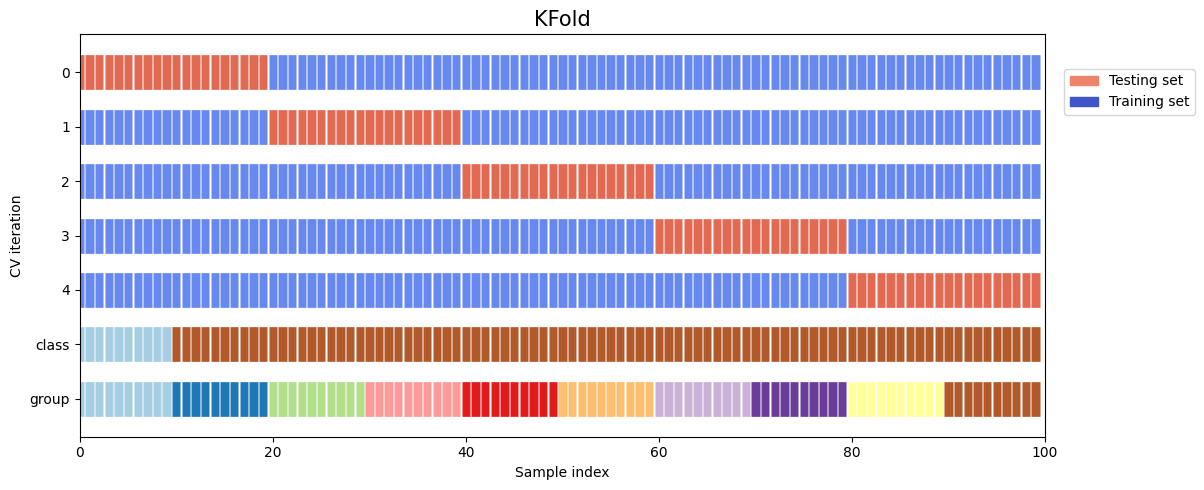

In [38]:
X_, y_, groups_ = utils.get_fake_X_y()
utils.plot_cv(KFold, X_, y_, groups_)

In [ ]:
kf = KFold()

#### **StratifiedKFold**

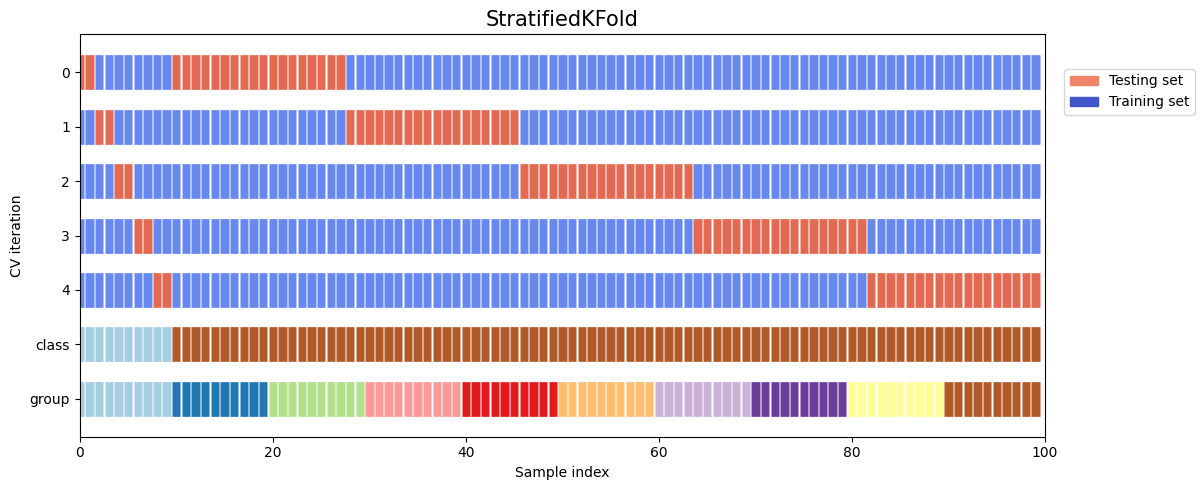

In [39]:
X_, y_, groups_ = utils.get_fake_X_y()
utils.plot_cv(StratifiedKFold, X_, y_, groups_)

#### **Group KFold**

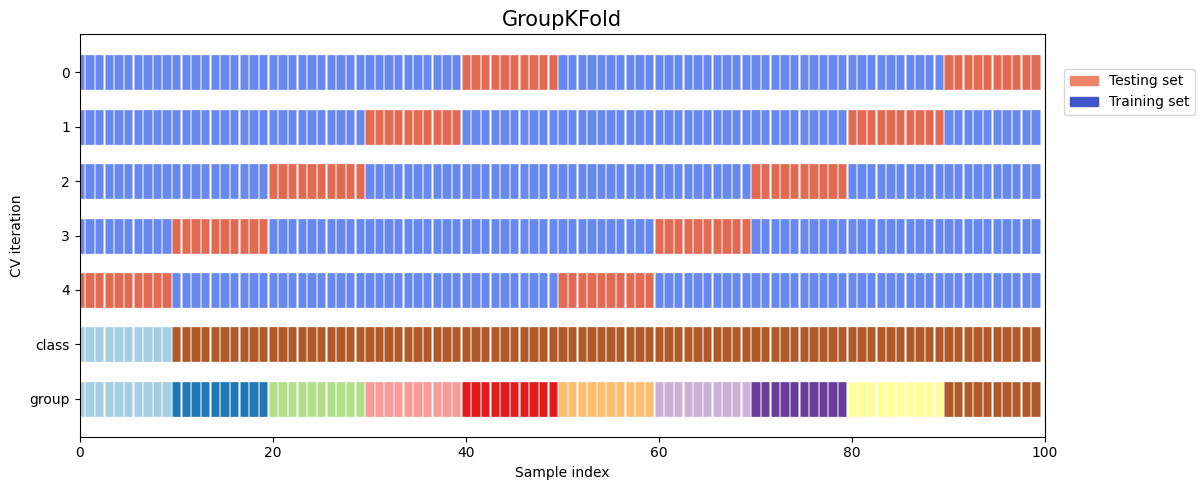

In [40]:
X_, y_, groups_ = utils.get_fake_X_y()
utils.plot_cv(GroupKFold, X_, y_, groups_)

#### **Stratified Group KFold**

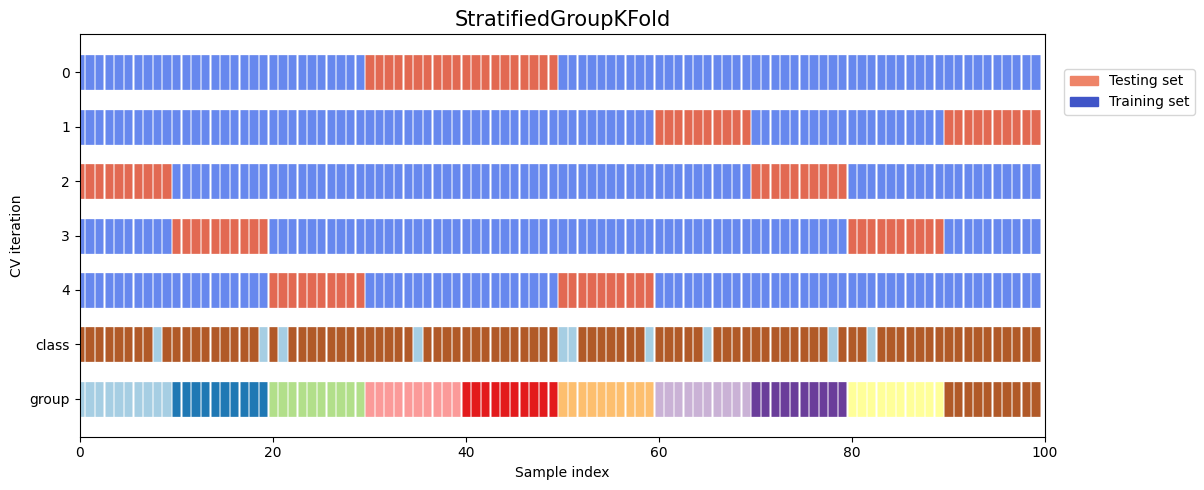

In [45]:
X_, y_, groups_ = utils.get_fake_X_y()
np.random.shuffle(y_)
utils.plot_cv(StratifiedGroupKFold, X_, y_, groups_)

#### **Time Series Split**

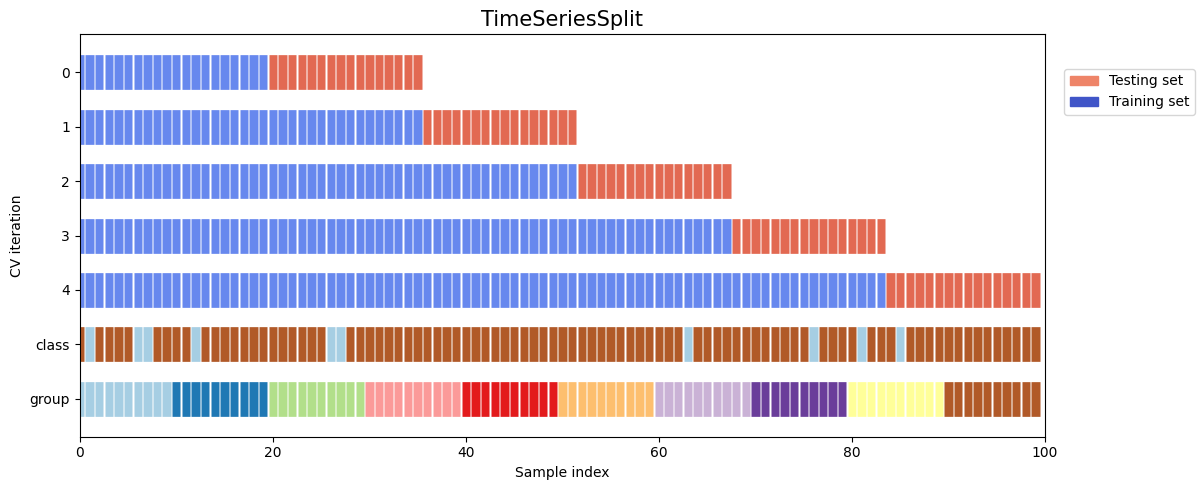

In [46]:
X_, y_, groups_ = utils.get_fake_X_y()
np.random.shuffle(y_)
utils.plot_cv(TimeSeriesSplit, X_, y_, groups_)